In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
# from sklearn.neighbors import KNeighborsClassifier

In [2]:
file_path = Path('Resources/Myopia.csv')
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
myopic = df['MYOPIC']

In [4]:
df = df.drop(['MYOPIC'], axis=1)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df = scaler.fit_transform(df)
X_df[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [6]:
X_df.shape

(618, 14)

In [7]:
from sklearn.decomposition import PCA

pca = PCA (n_components = 0.9)
df_pca = pca.fit_transform(X_df)

In [8]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [9]:
df_pca.shape

(618, 10)

In [10]:
from sklearn.manifold import TSNE

# tsne = TSNE(n_components=3, random_state=42, learning_rate= 300)
tsne = TSNE(learning_rate= 250)

tsne_features = tsne.fit_transform(df_pca)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [11]:
tsne_features.shape

(618, 2)

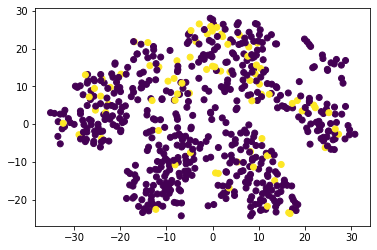

In [12]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = myopic)

In [13]:
from sklearn.cluster import KMeans

inertia =[]
k = list (range(1,11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(df_pca)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


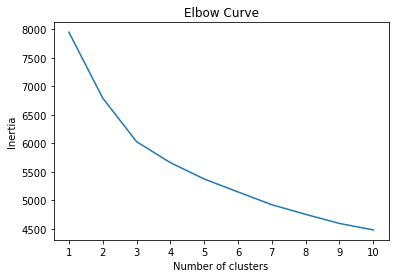

In [14]:
plt.plot (df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Recommendation

- The elbow curve shows that there aren't highly differentiated clusters.
- TSNE was not helpful in finding clusters because there's no clear movement.
- I recommend a larger dataset and a different training model.